4900
(4900,)
4900
(4900,)
4900
(4900,)


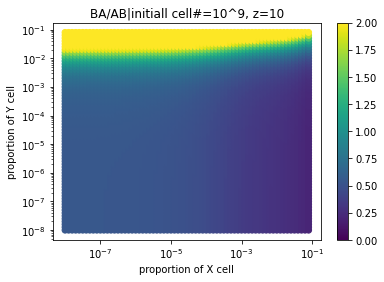

In [1]:
import numpy as np 
import matplotlib as mpl
from scipy.integrate import odeint 
import matplotlib.pyplot as plt 

def dyna(x, t, *arg):
    (qxw, pxw, qzw, pzw, qzx, pzx, qzy, pzy, a, b, c, f, g, h, k, p, q ) = arg
    dw = ((qxw*(x[1]/(x[0]+α)))/(pxw+(x[1]/(x[0]+α))) + ((qzw*(x[3]/(x[0]+α)))/(pzw+(x[3]/(x[0]+α))))+a)*x[0] 
    dx = g*x[0] + (((qzx*(x[3]/(x[1]+α)))/(pzx+(x[3]/(x[1]+α))))+b)*x[1]
    dy = h*x[0] + (((qzy*(x[3]/(x[2]+α)))/(pzy+(x[3]/(x[2]+α))))+c)*x[2]
    dz = k*x[0] + p*x[1] + q*x[2] + f*x[3]
    return np.array([dw, dx, dy, dz])

def dynb(x, t, *arg):
    (qyw, pyw, qzw, pzw, qzx, pzx, qzy, pzy, a, b, c, f, g, h, k, p, q ) = arg
    dw = ((qyw*(x[2]/(x[0]+α)))/(pyw+(x[2]/(x[0]+α))) + ((qzw*(x[3]/(x[0]+α)))/(pzw+(x[3]/(x[0]+α))))+a)*x[0] 
    dx = g*x[0] + (((qzx*(x[3]/(x[1]+α)))/(pzx+(x[3]/(x[1]+α))))+b)*x[1]
    dy = h*x[0] + (((qzy*(x[3]/(x[2]+α)))/(pzy+(x[3]/(x[2]+α))))+c)*x[2]
    dz = k*x[0] + p*x[1] + q*x[2] + f*x[3]
    return np.array([dw, dx, dy, dz])

α = 0.00000001

def title_and_labels(ax, title):
    ax.set_title(title)
    ax.set_xlabel("$x$", fontsize=10)
    ax.set_ylabel("$y$", fontsize=10)
    ax.set_zlabel("$z$", fontsize=10)
    
initial_N = 10**9
# X = 10**7
# Y = 10**7
# Z = 10
# W = initial_N-X-Y-Z

t_end = 1000
tana = 307
tanb = 567

qxw = 0.08
pxw = 0.0009
pyw = 0.08
qyw = 0.0009
qzw = 0.06
pzw = 0.0009
qzx = 0.07
pzx = 0.0009
qzy = 0.007
pzy = 0.0009

aA = -0.17
bA = 0.008
cA = -0.137

aB = -0.321
bB = -0.187
cB = 0.0203

f = 0.022
g = 0.0000001
h = 0.0000001 
k = 0.0000001 
p = 0.0000001 
q = 0.0000001
paramsA = (qxw, pxw, qzw, pzw, qzx, pzx, qzy, pzy, aA, bA, cA, f, g, h, k, p, q )
paramsB = (qyw, pyw, qzw, pzw, qzx, pzx, qzy, pzy, aB, bB, cB, f, g, h, k, p, q )

finalnumbera = list()
finalnumberb = list()
zratio = list()
xprop = list()
yprop = list()

for nx in np.arange(1, 8, 0.1):
    for ny in np.arange(1, 8, 0.1):
        xprop.append((10**nx)/initial_N)
        yprop.append((10**ny)/initial_N)
        list_ta = np.arange(0, tana, 0.01)
        list_t1a = np.arange(tana, t_end, 0.01)
        list_tb = np.arange(0, tanb, 0.01)
        list_t1b = np.arange(tanb, t_end, 0.01)
        cell_init = [initial_N - 10**nx - 10**ny - 10, 10**nx, 10**ny, 10]
        cellsa = odeint(dyna, cell_init, list_ta, args = paramsA)
        ia = len(list_ta)-1
        cell1_inita = [cellsa[ia, 0], cellsa[ia, 1], cellsa[ia, 2], cellsa[ia, 3]]
        cell1a = odeint(dyna, cell1_inita, list_t1a, args = paramsB)
        celltotal1a = cell1a[:, 0] + cell1a[:, 1] + cell1a[:, 2] + cell1a[:, 3]
        finalnumbera.append(celltotal1a[-1])
        cellsb = odeint(dyna, cell_init, list_tb, args = paramsB)
        ib = len(list_tb)-1
        cell1_initb = [cellsb[ib, 0], cellsb[ib, 1], cellsb[ib, 2], cellsb[ib, 3]]
        cell1b = odeint(dyna, cell1_initb, list_t1b, args = paramsA)
        celltotal1b = cell1b[:, 0] + cell1b[:, 1] + cell1b[:, 2] + cell1b[:, 3]
        finalnumberb.append(celltotal1b[-1])

zratio = [finalnumberb/finalnumbera for finalnumbera, finalnumberb in zip(finalnumbera, finalnumberb)]

X = np.array(xprop)
print(len(xprop))
print(X.shape)

Y = np.array(yprop)
print(len(yprop))
print(Y.shape)

Z = np.array(zratio, dtype=float)
print(len(zratio))
print(Z.shape)

cmap_thresholds = [0, 2, np.inf]
colors = ['yellow', 'white', 'blue']

plt.scatter(X, Y, c=Z, cmap=plt.cm.get_cmap('viridis'), vmin=0, vmax=2)
plt.colorbar()  # Add a colorbar for reference
plt.yscale('log')
plt.xscale('log')
plt.xlabel('proportion of X cell')
plt.ylabel('proportion of Y cell')
plt.title('BA/AB|initiall cell#=10^9, z=10')

plt.show()
